# Logistic Regression
The autompg dataset has been in popularity since many years. The dataset is formed so that we get to know about how cars were before with a poor acceleration, poor mpg and how they underwent an improvement. There are also important conclusions that can be drawn from the data. Japan and Europe have always been ahead in the competition compared to American cars that took a long time to get better. We apply a logistic regression to see if we can get the true positives and false positives for each category. We start our python program by importing the needed libraries. We will be needing numpy, matplotlib, pandas and sklearn.

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold

The dataset is imported in a csv format. We have made use of the autompg dataset as we mentioned before. The autompg dataset is imported in the csv format. The read_csv() function from pandas takes care of reading the data. Next, we drop the missing values that are present in our dataset. There are six missing values in six rows that have to be dropped. For this, we make use of the dropna() function. The variable inplace=True takes care of assigning a boolean value to the missing value and assigning it to true so that it can be identified and changed.

In [2]:
#Importing the dataset
adf = pd.read_csv('auto-mpg.csv')
adf.dropna(inplace=True)

Assign the features and the label. The features are assigned as X and the label is assigned as y. 

In [3]:
X = adf.drop(["origin", "car name"], axis=1) # features
y = adf["origin"]  # label

The class names are derived and are arranged in ascending order.

In [4]:
# get the unique class names and sort them in ascending order.
the_classes = y.unique()
the_classes.sort()

Next, we perform a feature scaling by using the StandardScaler. The function fit_transform() now takes care of scaling the data to an appropriate size so that it easily fits in the graph.

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533, -0.69863841],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533, -1.08349824],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533, -0.69863841],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964,  1.09737414],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964,  0.5842277 ],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964,  0.96908753]])

A split is performed on the dataset by using the train_test_split() function. The test_size is assigned as 0.25 and the random_state is assigned as 0. The dataset is split into the corresponding parts as X_train, X_test, y_train, y_test respectively. A test_size of 0.25 would mean that the dataset is split into equal parts of four.

In [6]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

We now start with the logistic regression modelling. We start this by importing the respective libraries and modules. A classifier is created with the details given below as random_state 0 and the solver as liblinear.

In [7]:
#Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='liblinear')

A StratifiedKFold is performed with 10 splits. The whole command for StratifiedKFold is run and the output is seen if it is performed in the right manner. In our case, we got the correct result.

In [8]:
skf4 = StratifiedKFold(n_splits = 10, shuffle = True, random_state=None)
splitter = skf4
splitter.get_n_splits(X)
print(splitter)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


A train_index and a test_index is assigned and fit into the classifier. We have got a new variable here called as y_pred. An accuracy score is also got for each of the 10 splits.

In [9]:
for train_index, test_index in splitter.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.775
Accuracy:  0.825
Accuracy:  0.6923076923076923
Accuracy:  0.7948717948717948
Accuracy:  0.717948717948718
Accuracy:  0.9487179487179487
Accuracy:  0.7692307692307693
Accuracy:  0.717948717948718
Accuracy:  0.7692307692307693
Accuracy:  0.8205128205128205


A confusion matrix is performed by the two values of y_test and y_pred. 

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21  0  3]
 [ 1  5  1]
 [ 1  1  6]]


A plot of the confusion matrix in the form of a  heat map appears below. A darker red shows a value that is very high and the lighter reds shows the lesser values. 

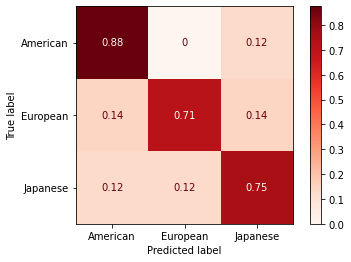

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, 
                      display_labels=["American","European","Japanese"],
                     cmap = plt.cm.Reds, normalize='true')  
plt.show()

We next move on to plotting our roc curve and also finding out the auc.

In [12]:
from sklearn.metrics import roc_curve, auc

probs = classifier.predict_proba(X_test)

A Binarization is performed on the predicted and the test labels. Binarization allows us to do a one vs rest ROC curve for each of the categories (labels).

In [13]:
#Binarize both the predicted and test labels.
from sklearn.preprocessing import label_binarize
y_pred_bnz = label_binarize(y_pred, classes = the_classes)
y_test_bnz = label_binarize(y_test, classes = the_classes)

The colors that are needed for our plot and the linestyles are obtained using python generators.

In [14]:
from itertools import cycle
# a generator to get a color carousel
plotcol = (col for col in cycle(['aqua','darkorange','cornflowerblue','navy','blue','green']))
lstyle = (style for style in cycle(['dashed','solid','dotted','dashdot']))

An ROC curve is known as the Reciever Operating Characteristic curve. An ROC curve is a graphical plot that helps in varying the diagnostic ability of a binary classifier by varying its discrimination threshold. Perform a plot of the ROC curve as shown in the code below. The code specifies the various parameters for constructing our ROC curve. We have also included the micro-average ROC curve that looks at the overall TPR and FPR rates.

1 auc:0.9528
2 auc:0.9330
3 auc:0.8871


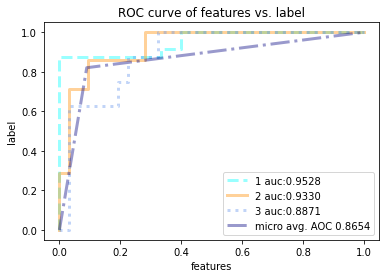

In [15]:
# an ROC with a micro average
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

for idx, cls in enumerate(the_classes):
    fpr, tpr, thr = roc_curve(y_test_bnz[:,idx],probs[:,idx])
    roc_auc = auc(fpr,tpr)
    label_str = '%s auc:%0.4f' % (the_classes[idx],roc_auc)
    print(label_str)
    plt.plot(fpr, tpr, color=next(plotcol), linewidth=3, linestyle=next(lstyle), label = label_str, alpha=0.4)
    plt.legend(loc = 'lower right')
    plt.xlabel("features")
    plt.ylabel("label")
    plt.title("ROC curve of features vs. label")
    
fpr_micro, tpr_micro, _ = roc_curve(y_test_bnz.ravel(), y_pred_bnz.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
label_str = 'micro avg. AOC %0.4f' % (roc_auc_micro)
plt.plot(fpr_micro, tpr_micro, color=next(plotcol), linewidth=3, linestyle=next(lstyle), label=label_str, alpha=0.4)
plt.legend(loc = 'lower right')
plt.show(block=False)

